### Step

Perlukah Data test nya di WOE dan binning?

1. Modeling with logreg
    - baseline
    - logreg
    - hyperparams
2. Model Evaluation with:
    - AUCROC
    - Gini
    - K-S
3. Get weights and convert into final score

In [151]:
from src.helper import load_pickle, dump_pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data 

In [152]:
dataset = load_pickle("data/processed/final_train_v3.pkl")

dataset.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,TARGET,AMT_INCOME_TOTAL_0_100k,AMT_INCOME_TOTAL_100k_150k,AMT_INCOME_TOTAL_150k_200k,...,AMT_CREDIT_800k_1m,AMT_CREDIT_1m,AMT_ANNUITY_20k,AMT_ANNUITY_30k,AMT_ANNUITY_46k,AMT_ANNUITY_50k,AMT_GOODS_PRICE_300k,AMT_GOODS_PRICE_600k,AMT_GOODS_PRICE_900k,AMT_GOODS_PRICE_1m
185640,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
266989,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
37682,1.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
280087,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
255967,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [153]:
test_set = load_pickle("data/processed/final_test_v3.pkl")

test_set.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,TARGET,AMT_INCOME_TOTAL_0_100k,AMT_INCOME_TOTAL_100k_150k,AMT_INCOME_TOTAL_150k_200k,...,AMT_CREDIT_800k_1m,AMT_CREDIT_1m,AMT_ANNUITY_20k,AMT_ANNUITY_30k,AMT_ANNUITY_46k,AMT_ANNUITY_50k,AMT_GOODS_PRICE_300k,AMT_GOODS_PRICE_600k,AMT_GOODS_PRICE_900k,AMT_GOODS_PRICE_1m
54382,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
252585,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
181435,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
116552,1.0,0.0,1.0,0.0,0.0,1.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
255329,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [154]:
X_train = dataset.drop(["TARGET"], axis=1)
y_train = dataset["TARGET"]

In [155]:
X_test = test_set.drop(["TARGET"], axis=1)
y_test = test_set["TARGET"]

In [156]:
X_train

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,AMT_INCOME_TOTAL_0_100k,AMT_INCOME_TOTAL_100k_150k,AMT_INCOME_TOTAL_150k_200k,AMT_INCOME_TOTAL_200k_250k,...,AMT_CREDIT_800k_1m,AMT_CREDIT_1m,AMT_ANNUITY_20k,AMT_ANNUITY_30k,AMT_ANNUITY_46k,AMT_ANNUITY_50k,AMT_GOODS_PRICE_300k,AMT_GOODS_PRICE_600k,AMT_GOODS_PRICE_900k,AMT_GOODS_PRICE_1m
185640,1.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
266989,1.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
37682,1.0,0.0,0.0,1.0,0.0,1.0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
280087,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
255967,1.0,0.0,1.0,0.0,0.0,1.0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206264,1.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
123969,1.0,0.0,1.0,0.0,0.0,1.0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
116922,1.0,0.0,0.0,1.0,1.0,0.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
118218,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [157]:
y_train

185640    0
266989    0
37682     0
280087    0
255967    0
         ..
206264    0
123969    0
116922    1
118218    0
263659    0
Name: TARGET, Length: 1600, dtype: int64

#### Baseline Modeling 

In [158]:
from sklearn.dummy import DummyClassifier

In [159]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [160]:
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [161]:
dummy_clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [162]:
acc_test_dummy = dummy_clf.score(X_test, y_test)
acc_test_dummy

0.92

#### Modeling with Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

pake params weight_balance

In [164]:
logreg = LogisticRegression()

In [165]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [166]:
y_pred_train_proba = logreg.predict_proba(X_train)

y_pred_train_proba

array([[0.89561766, 0.10438234],
       [0.93807162, 0.06192838],
       [0.93646948, 0.06353052],
       ...,
       [0.88697722, 0.11302278],
       [0.96688673, 0.03311327],
       [0.87906259, 0.12093741]])

In [167]:
y_pred_train = logreg.predict(X_train)

In [168]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.92

In [169]:
y_pred_test = logreg.predict(X_test)

In [170]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.92

In [171]:
print(f"Logistic Regression training accuracy {acc_train}")
print(f"Logistic Regression test accuracy {acc_test}")

Logistic Regression training accuracy 0.92
Logistic Regression test accuracy 0.92


In [172]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       368
           1       0.00      0.00      0.00        32

    accuracy                           0.92       400
   macro avg       0.46      0.50      0.48       400
weighted avg       0.85      0.92      0.88       400



/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [173]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
# est = sm.Logit(y_train, X_train)
est = sm.Logit(y_train, X2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.268657
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1579
Method:                           MLE   Df Model:                           20
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                 0.03627
Time:                        11:48:39   Log-Likelihood:                -429.85
converged:                       True   LL-Null:                       -446.03
Covariance Type:            nonrobust   LLR p-value:                   0.03962
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.7793   8.05e+06  -

In [174]:
result_coef = pd.read_html(est2.summary().tables[1].as_html(),header=0,index_col=0,flavor='html5lib')[0]
result_coef = result_coef.reset_index()

result_coef = result_coef[["index", "coef"]].copy()
# result_coef = result_coef["coef"]

In [175]:
result_coef

,index,coef
0,const,-0.7793
1,NAME_CONTRACT_TYPE_Cash loans,-0.3971
2,NAME_CONTRACT_TYPE_Revolving loans,-0.3822
3,CODE_GENDER_F,-0.7757
4,CODE_GENDER_M,-0.0035
5,FLAG_OWN_CAR_N,-0.0115
6,FLAG_OWN_CAR_Y,-0.7678
7,AMT_INCOME_TOTAL_0_100k,-0.0406
8,AMT_INCOME_TOTAL_100k_150k,0.2729
9,AMT_INCOME_TOTAL_150k_200k,0.1903


In [176]:
# hyperparams tuning
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=75)]
     }

# stratified kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
logreg = LogisticRegression()

# search
lr_clf = RandomizedSearchCV(logreg,
                            param,
                            scoring='roc_auc',
                            cv=skf,
                            refit=True) # refits best model to entire dataset

search_lr = lr_clf.fit(X_train, y_train)

# best hyperparameters
search_lr.best_params_

/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_

{'penalty': 'l2', 'C': 0.12162162162162163}

In [177]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

best_params = search_lr.best_params_
lr_tuning = LogisticRegression(**best_params)
lr_tuning.fit(X_train, y_train)

y_train_pred_proba = lr_tuning.predict_proba(X_train)[:][:,1]
y_test_pred_lr_proba = lr_tuning.predict_proba(X_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_train_pred_proba))
print('AUC Test Proba :', roc_auc_score(y_test, y_test_pred_lr_proba))

AUC Train Proba : 0.6345984417459238
AUC Test Proba : 0.5795686141304348


In [178]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_train_proba = lr_tuning.predict_proba(X_train)[:][:,1]
y_test_proba = lr_tuning.predict_proba(X_test)[:][:,1]

y_train_pred = lr_tuning.predict(X_train)
y_test_pred = lr_tuning.predict(X_test)

print('TRAINING RESULT:')
print('======================================================')
print('AUC Score:', np.round(roc_auc_score(y_train, y_train_proba),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('AUC Score:', np.round(roc_auc_score(y_test, y_test_proba),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
AUC Score: 0.635
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1472
           1       0.00      0.00      0.00       128

    accuracy                           0.92      1600
   macro avg       0.46      0.50      0.48      1600
weighted avg       0.85      0.92      0.88      1600

Confussion Matrix ------------------------------------
[[1472    0]
 [ 128    0]]


TESTING RESULT:
AUC Score: 0.58
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       368
           1       0.00      0.00      0.00        32

    accuracy                           0.92       400
   macro avg       0.46      0.50      0.48       400
weighted avg       0.85      0.92      0.88       400

Confussion Matrix ------------------------------------
[[368   0]
 [ 32   0]]


/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

#### ROC Curve 

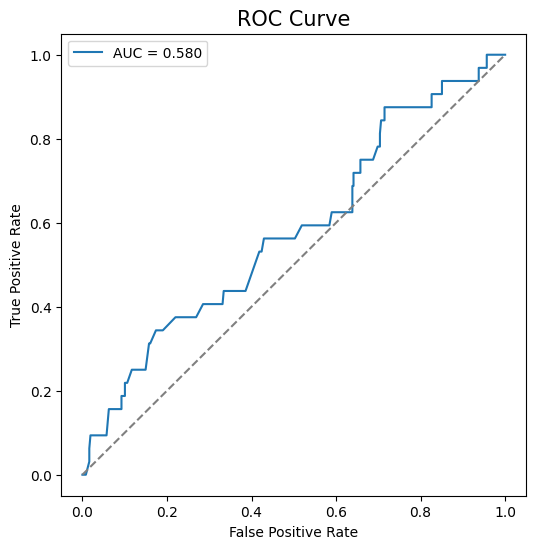

In [179]:
fpr, tpr, tr = roc_curve(y_test, y_test_proba)
auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()

#### K-S 

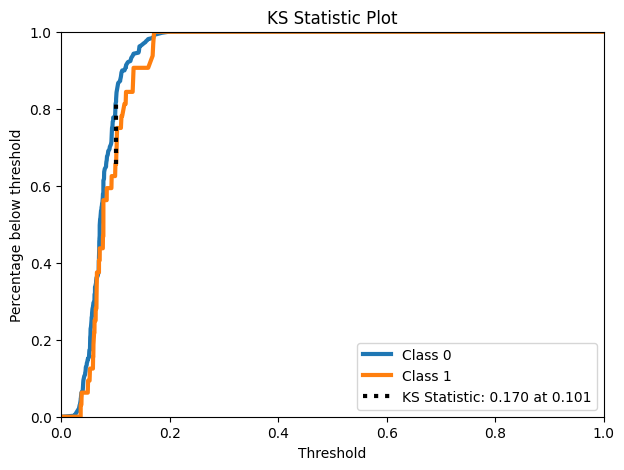

In [180]:
import scikitplot as skplt
y_pred_proba = lr_tuning.predict_proba(X_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(7,5));

#### Gini Score

$$Gini = 2 * AUC - 1$$

Gini Interpretation:
- Gini coefficient range nya dari -1 sampai 1, higher values menandakan better discrimination power
- What is discrimination power? merupakan ability model kita untuk membedakan kelas pada data
- Jika Gini value 0, itu menandakan model hanya random guess
- Sedangkan jika Gini Value 1 itu menandakan model bisa membedakan antara positif dan negatif class
- Gini coefficient dan AUC itu berkorelasi, Gini itu rescaled version dari AUC

In [181]:
gini_score = 2 * auc - 1

gini_score

0.15913722826086962

#### Convert to Score 

Formula convert to Score

$$
\sum_{j, i=1}^{k, n} (-(woe_j * \beta_i + \frac{a}{n})*\text{factor} + \frac{\text{offset}}{n})
$$

Ada dua cara:
1. Kita input data manual buat coef dan WOE
2. Dibuat otomasi, but how???

For now, kita manual aja input value WOE nya

Untuk value PDO, Base Score, dan Odds nya sudah ditentuin darisana nya

In [182]:
result_coef

,index,coef
0,const,-0.7793
1,NAME_CONTRACT_TYPE_Cash loans,-0.3971
2,NAME_CONTRACT_TYPE_Revolving loans,-0.3822
3,CODE_GENDER_F,-0.7757
4,CODE_GENDER_M,-0.0035
5,FLAG_OWN_CAR_N,-0.0115
6,FLAG_OWN_CAR_Y,-0.7678
7,AMT_INCOME_TOTAL_0_100k,-0.0406
8,AMT_INCOME_TOTAL_100k_150k,0.2729
9,AMT_INCOME_TOTAL_150k_200k,0.1903


In [183]:
def assign_woe(data):
    
    scorecard = data.copy()
    
    scorecard["woe"] = [1, 0.685094, -4.132614, 0.468123,
                        -0.908804, 0.436072, -0.791026, -0.068908,
                        0.516318, -0.026284, -0.361182, -1.506673,
                        -1.178114, -0.600287, 0.451436, 0.144006,
                        -0.324405, -0.825785, -0.081106, 0.258940,
                        0.085916, -0.106531, -1.226783, 0.295424,
                        0.166311, -0.332579, -0.783240
                       ]
    
    return scorecard

In [184]:
scorecard_point = result_coef.copy()

In [185]:
scorecard_point = assign_woe(scorecard_point)

In [186]:
scorecard_point

,index,coef,woe
0,const,-0.7793,1.000000
1,NAME_CONTRACT_TYPE_Cash loans,-0.3971,0.685094
2,NAME_CONTRACT_TYPE_Revolving loans,-0.3822,-4.132614
3,CODE_GENDER_F,-0.7757,0.468123
4,CODE_GENDER_M,-0.0035,-0.908804
5,FLAG_OWN_CAR_N,-0.0115,0.436072
6,FLAG_OWN_CAR_Y,-0.7678,-0.791026
7,AMT_INCOME_TOTAL_0_100k,-0.0406,-0.068908
8,AMT_INCOME_TOTAL_100k_150k,0.2729,0.516318
9,AMT_INCOME_TOTAL_150k_200k,0.1903,-0.026284


In [187]:
def calculate_point(scorecard):    
    PDO = 20
    BASE_SCORE = 600
    ODDS = 50

    FACTOR = PDO / np.log(2)
    OFFSET = BASE_SCORE - (FACTOR * np.log(ODDS))
    
    scorecard["score"] = round(-(scorecard_point["woe"] * scorecard_point["coef"] + \
                                 scorecard_point["coef"][0] / len(scorecard_point)) * \
                               FACTOR + OFFSET / len(scorecard_point), 2)
    
    return scorecard

In [188]:
scorecard_point = calculate_point(scorecard_point)

In [189]:
scorecard_point

,index,coef,woe,score
0,const,-0.7793,1.000000,41.36
1,NAME_CONTRACT_TYPE_Cash loans,-0.3971,0.685094,26.72
2,NAME_CONTRACT_TYPE_Revolving loans,-0.3822,-4.132614,-26.70
3,CODE_GENDER_F,-0.7757,0.468123,29.35
4,CODE_GENDER_M,-0.0035,-0.908804,18.78
5,FLAG_OWN_CAR_N,-0.0115,0.436072,19.02
6,FLAG_OWN_CAR_Y,-0.7678,-0.791026,1.35
7,AMT_INCOME_TOTAL_0_100k,-0.0406,-0.068908,18.79
8,AMT_INCOME_TOTAL_100k_150k,0.2729,0.516318,14.81
9,AMT_INCOME_TOTAL_150k_200k,0.1903,-0.026284,19.02


In [190]:
len(X_test.iloc[0])

26

In [191]:
len(scorecard_point["score"])

27

In [192]:
X_test.insert(0, 'Intercept', 1)

In [193]:
a = X_test.iloc[0].to_numpy()

In [195]:
a

array([1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0.])

In [197]:
X_test.iloc[0]

Intercept                             1.0
NAME_CONTRACT_TYPE_Cash loans         1.0
NAME_CONTRACT_TYPE_Revolving loans    0.0
CODE_GENDER_F                         1.0
CODE_GENDER_M                         0.0
FLAG_OWN_CAR_N                        1.0
FLAG_OWN_CAR_Y                        0.0
AMT_INCOME_TOTAL_0_100k               0.0
AMT_INCOME_TOTAL_100k_150k            1.0
AMT_INCOME_TOTAL_150k_200k            0.0
AMT_INCOME_TOTAL_200k_250k            0.0
AMT_INCOME_TOTAL_250k_300k            0.0
AMT_INCOME_TOTAL_>_300k               0.0
AMT_CREDIT_0_200k                     0.0
AMT_CREDIT_200k_400k                  0.0
AMT_CREDIT_400k_600k                  0.0
AMT_CREDIT_600k_800k                  0.0
AMT_CREDIT_800k_1m                    0.0
AMT_CREDIT_1m                         1.0
AMT_ANNUITY_20k                       0.0
AMT_ANNUITY_30k                       0.0
AMT_ANNUITY_46k                       1.0
AMT_ANNUITY_50k                       0.0
AMT_GOODS_PRICE_300k              

In [198]:
scorecard_point["score"]

0     41.36
1     26.72
2    -26.70
3     29.35
4     18.78
5     19.02
6      1.35
7     18.79
8     14.81
9     19.02
10    15.63
11   -20.56
12    19.43
13    16.66
14    13.29
15    18.60
16    15.48
17     9.22
18    17.99
19    21.64
20    19.37
21    18.39
22    17.03
23    23.56
24    20.40
25    16.50
26    18.33
Name: score, dtype: float64

In [194]:
b = scorecard_point["score"].to_numpy()

In [196]:
b

array([ 41.36,  26.72, -26.7 ,  29.35,  18.78,  19.02,   1.35,  18.79,
        14.81,  19.02,  15.63, -20.56,  19.43,  16.66,  13.29,  18.6 ,
        15.48,   9.22,  17.99,  21.64,  19.37,  18.39,  17.03,  23.56,
        20.4 ,  16.5 ,  18.33])

In [146]:
c = X_test.copy()

In [149]:
len(c.iloc[0])

28

In [148]:
#bug

for i in range(len(c)):
    tmp_data = c.iloc[i].to_numpy()
    point = scorecard_point["score"].to_numpy()
    
    c["final_score"] = tmp_data @ point

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 27 is different from 28)

In [142]:
a @ b

167.64

Validasi

- intercept
- cash
- f
- car_n
- incom 100-150
- amt_credit 1m
- annuity 46k

In [205]:
scorecard_point

,index,coef,woe,score
0,const,-0.7793,1.000000,41.36
1,NAME_CONTRACT_TYPE_Cash loans,-0.3971,0.685094,26.72
2,NAME_CONTRACT_TYPE_Revolving loans,-0.3822,-4.132614,-26.70
3,CODE_GENDER_F,-0.7757,0.468123,29.35
4,CODE_GENDER_M,-0.0035,-0.908804,18.78
5,FLAG_OWN_CAR_N,-0.0115,0.436072,19.02
6,FLAG_OWN_CAR_Y,-0.7678,-0.791026,1.35
7,AMT_INCOME_TOTAL_0_100k,-0.0406,-0.068908,18.79
8,AMT_INCOME_TOTAL_100k_150k,0.2729,0.516318,14.81
9,AMT_INCOME_TOTAL_150k_200k,0.1903,-0.026284,19.02


In [206]:
41.36 + 26.72 + 29.35 + 19.02 + 14.81 + 17.99 + 18.39

167.64